In [474]:
# Author Kate Lisovenko

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns


The parameter **na_values** = ["NA", "N/A", "-", "", " "] is used when loading data in pandas to specify certain values that should be interpreted as missing data (NaN).<br>
This parameter creates a list of values that pandas will recognize as placeholders for missing or null entries.


In [475]:
# loading data
na_values = ["NA", "N/A", "-", "", " "] # t
data = pd.read_csv('././weather_6_data.csv',na_values=na_values )
data['date'].head(3)

0    10-apr-1996 14:00
1    31-jul-1996 08:00
2    31-jul-1996 09:00
Name: date, dtype: object

In [476]:
#%d for the two-digit day
#%b for the abbreviated month name
#%Y for the four-digit year

data['date'] = pd.to_datetime(data['date'],format='%d-%b-%Y %H:%M')
#data['date'].head()

In [477]:
print(f"The first date of observation is {data['date'].min()}")
print(f"The last date of observation is {data['date'].max()}")

The first date of observation is 1996-04-10 14:00:00
The last date of observation is 2024-10-01 00:00:00


In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246930 entries, 0 to 246929
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    246930 non-null  datetime64[ns]
 1   ind     246930 non-null  int64         
 2   rain    246881 non-null  float64       
 3   ind.1   246930 non-null  int64         
 4   temp    246930 non-null  float64       
 5   ind.2   246930 non-null  int64         
 6   wetb    246930 non-null  float64       
 7   dewpt   246930 non-null  float64       
 8   vappr   246930 non-null  float64       
 9   rhum    246930 non-null  int64         
 10  msl     246912 non-null  float64       
 11  ind.3   246930 non-null  int64         
 12  wdsp    246880 non-null  float64       
 13  ind.4   246930 non-null  int64         
 14  wddir   246878 non-null  float64       
 15  ww      192218 non-null  float64       
 16  w       192217 non-null  float64       
 17  sun     246930 non-null  floa

In [479]:
# searching for missing data
missing_percentage = round(data.isnull().sum() / len(data) * 100, 2)
missing_percentage

date      0.00
ind       0.00
rain      0.02
ind.1     0.00
temp      0.00
ind.2     0.00
wetb      0.00
dewpt     0.00
vappr     0.00
rhum      0.00
msl       0.01
ind.3     0.00
wdsp      0.02
ind.4     0.00
wddir     0.02
ww       22.16
w        22.16
sun       0.00
vis      25.03
clht      0.01
clamt     0.01
dtype: float64

##### There is a sagnificant lack of data here:
ww:    -  Synop code for Present Weather -22.16%<br>
w:     -  Synop code for Past Weather -22.16%<br>
vis:   -  Visibility (m) - 25.03%<br>

### The Temperature plot

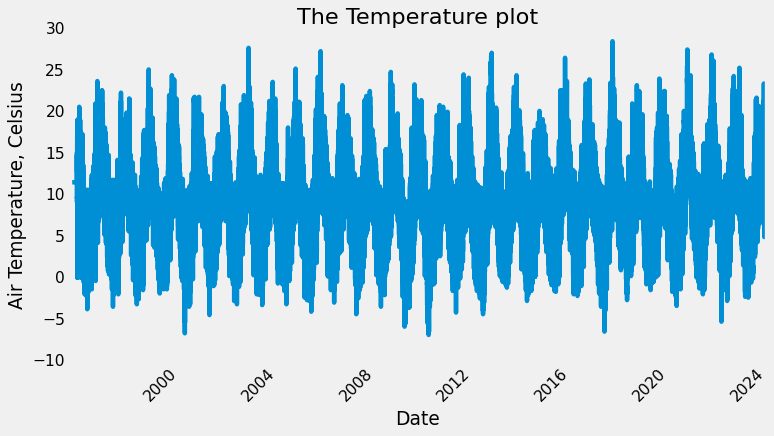

In [480]:
plt.figure(figsize=(10, 5))
plt.plot(data['date'], data['temp'])
plt.title('The Temperature plot')
plt.xlabel('Date')
plt.ylabel('Air Temperature, Celsius')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [481]:
#data.head()

### The mean temperature each day

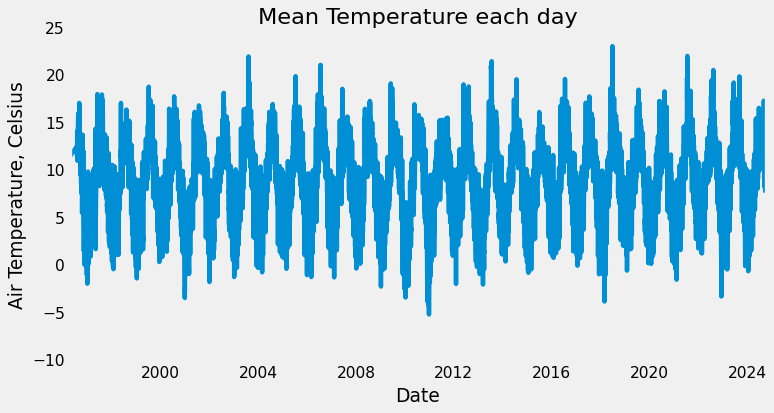

In [482]:
#print(data[['date','temp']].head(2))

# Getting mean for each day
grouped_data_day = data.groupby(data['date'].dt.date)['temp'].mean().reset_index()
grouped_data_day.columns = ['date', 'avg_temp']

# plot
plt.figure(figsize=(10, 5))
plt.plot(grouped_data_day['date'], grouped_data_day['avg_temp'])
plt.ylabel('Air Temperature, Celsius')
plt.xlabel('Date')
plt.grid()
plt.title("Mean Temperature each day")
plt.show()
     

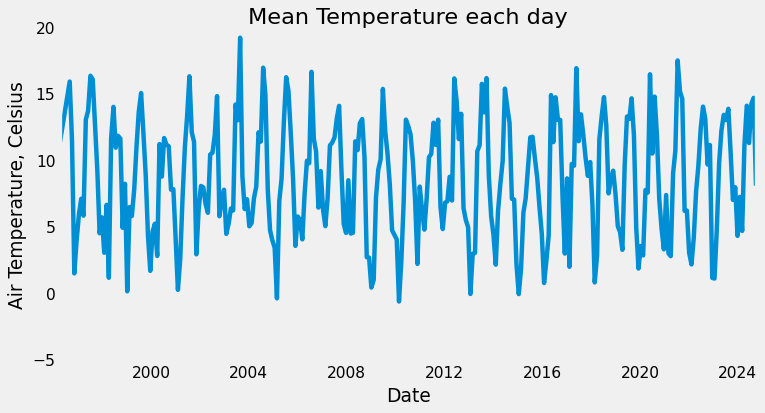

In [483]:
# this number can be change
number_of_points = 300

# Using np.linspace for choosing indexes
indices = np.linspace(0, len(grouped_data_day)-1, number_of_points).astype(int)

selected_dates = grouped_data_day['date'].iloc[indices]
selected_temps = grouped_data_day['avg_temp'].iloc[indices]

plt.figure(figsize=(10, 5))
plt.plot(selected_dates, selected_temps)
plt.ylabel('Air Temperature, Celsius')
plt.xlabel('Date')
plt.grid()
plt.title("Mean Temperature each day")
plt.show()

### The mean temperature for each month (1996-2024)

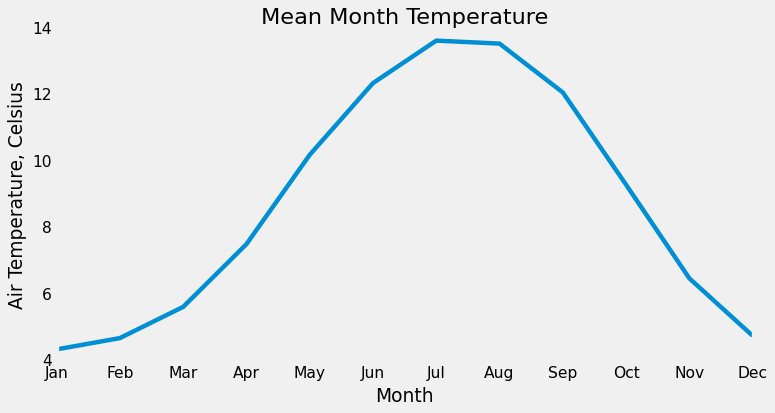

In [484]:
grouped_data_month = data.groupby(data['date'].dt.month)['temp'].mean().reset_index()
grouped_data_month['month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
grouped_data_month['mean_temp'] = round(grouped_data_month['temp'],2)

#plot

plt.figure(figsize=(10, 5))
plt.plot(grouped_data_month['month'], grouped_data_month['mean_temp'])
plt.ylabel('Air Temperature, Celsius')
plt.xlabel('Month')
plt.grid()
plt.title("Mean Month Temperature")
plt.show()

### The Windspeed (there is data missing from this column)

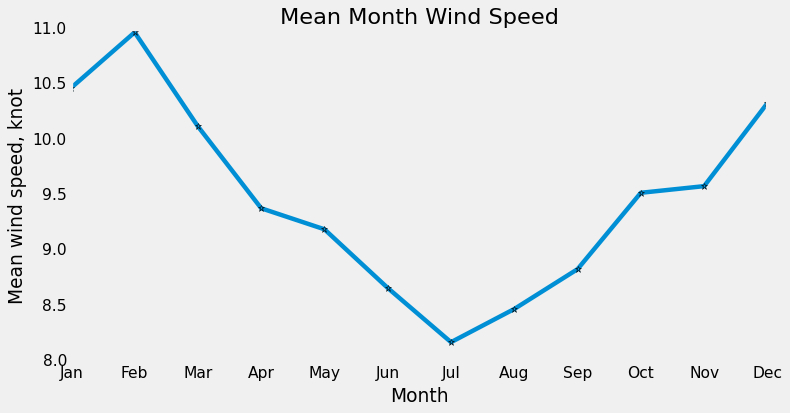

In [485]:
# As I calculated, the persentage of missing data for this column (wdsp) is 0.02. 

grouped_month_wdsp = data.groupby(data['date'].dt.month)['wdsp'].mean().reset_index()
grouped_month_wdsp['month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
grouped_month_wdsp['mean_wdsp'] = round(grouped_month_wdsp['wdsp'],2)

#plot
plt.figure(figsize=(10, 5))
plt.plot(grouped_month_wdsp['month'], grouped_month_wdsp['mean_wdsp'], marker="*")
plt.ylabel('Mean wind speed, knot')
plt.xlabel('Month')
plt.grid()
plt.title("Mean Month Wind Speed")
plt.show()

### The rolling windspeed (say over 24 hours)

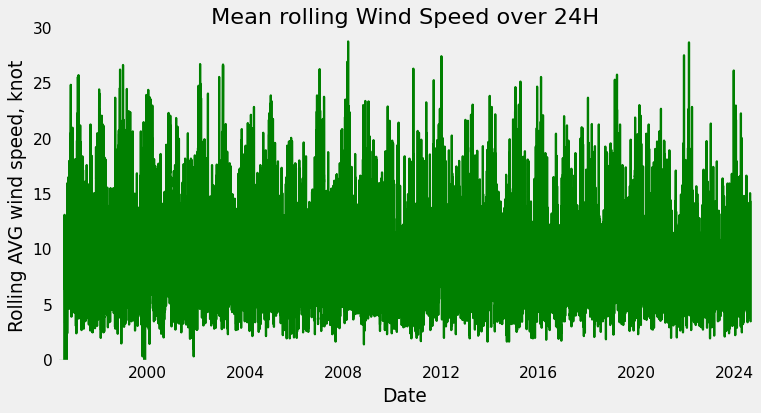

In [487]:
# Ref.: https://www.geeksforgeeks.org/pandas-rolling-mean-by-time-interval/

#set 'date' as an index
data_index = data.set_index('date')


# window : Size of the window. 
# That is how many observations we have to take for the calculation of each window.
# min_periods (because I have missed data) : Least number of observations in a window 
# required to have a value (otherwise result is NA)

data['rolling_avg_wdsp'] = data['wdsp'].rolling(window=24, min_periods=1).mean()

#plot
plt.figure(figsize=(10, 5))
plt.plot(data['date'], data['rolling_avg_wdsp'], color='green', linewidth=2)
plt.ylabel('Rolling AVG wind speed, knot')
plt.xlabel('Date')
plt.grid()
plt.title("Mean rolling Wind Speed over 24H")
plt.show()


### The max windspeed for each day

### The monthly mean of the daily max windspeeds (yer I am being nasty here)